In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## implementing XGB

In [5]:
import xgboost as xgb 

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
X = boston.data
Y = boston.target

### We need to convert it into DMatrix of Xgboost for doing Model Training

In [8]:
data_matrix = xgb.DMatrix(data=X,label=Y)
data_matrix

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainx, testx, trainy, testy = train_test_split(X,Y,random_state=0)

### SImple implementation

In [11]:
xreg = xgb.XGBRegressor(learning_rate=.1, max_depth = 5, n_estimators=10)
xreg.fit(trainx,trainy)
ypred = xreg.predict(testx)
rmse = np.sqrt(mean_squared_error(testy, ypred))
rmse

9.777224181641056

### Actual Implementation

In [12]:
# all param will be in a dictionary
params = {
    'learning_rate':.1,
    'max_depth':5,
    'alpha':10,
}

In [13]:
result = xgb.cv(dtrain= data_matrix,
                params= params,
                nfold = 3,
                num_boost_round=100,
                early_stopping_rounds=10,
                metrics='rmse',
                seed = 0 )

In [14]:
result

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.633838,0.304022,21.629371,0.668377
1,19.626059,0.273856,19.639051,0.655697
2,17.817539,0.244526,17.868343,0.673886
3,16.186888,0.223546,16.254699,0.657798
4,14.723644,0.198366,14.831833,0.661576
...,...,...,...,...
95,1.131051,0.062884,3.511877,0.412322
96,1.125299,0.060671,3.508768,0.410557
97,1.119292,0.061531,3.507635,0.410045
98,1.114016,0.062423,3.506388,0.409089


<AxesSubplot:>

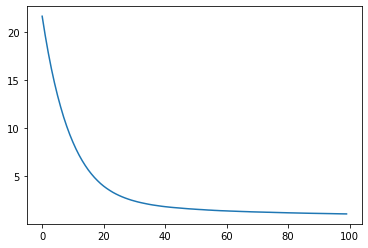

In [15]:
result['train-rmse-mean'].plot()